Implementing bucket sort

In [94]:
import math
import numpy as np

def insertion_sort(list):
#     print("*** PERFORMING INSERTION SORT ***")
    for j in range (1, len(list)):
        # determine the key
        key = list[j]
        # set i to find preceeding element
        i = j - 1

        while i >= 0 and list[i] > key:
            # replace the suceeding element by preceeding if it is greater than key
            list[i + 1] = list[i]
            i = i - 1
        list[i + 1] = key

#     print("List Sorted in ascending order by insertion sort is :", list)


def bucket_sort(A):
    
    sorted_array = []
    n = len(A)
    bucket = [[] for _ in range(n)]
    
    for i in range(n):
        bucket[math.floor(n * A[i]/10**len(str(A[i])))].append(A[i])
    
    for i in range(n):
        insertion_sort(bucket[i])
        sorted_array = sorted_array + bucket[i]
    return sorted_array
        

In [95]:
A = [0.79, 0.13, 0.16, 0.64, 0.39, 0.20, 0.89, 0.53, 0.71, 0.42]
# A = [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
sorted_array = bucket_sort(A)
print("Sorted array is:", sorted_array)

Sorted array is: [0.13, 0.16, 0.2, 0.39, 0.42, 0.53, 0.64, 0.71, 0.79, 0.89]


Implementing counting sort

In [96]:
def counting_sort(A):
    k = max(A)
    C = [None]*(k+1)
    B = [None]*len(A)
    
    for i in range(k+1):
        C[i] = 0
    for j in range(len(A)):
        C[A[j]] = C[A[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(A)-1,-1,-1):
        B[C[A[j]]-1] = A[j]
        C[A[j]] = C[A[j]] - 1
    return B
        

In [97]:
A = [6,0,2,0,1,3,4,6,1,3,2] 
sorted_array = counting_sort(A)
print("Sorted Array", sorted_array)

Sorted Array [0, 0, 1, 1, 2, 2, 3, 3, 4, 6, 6]


Implementing radix sort

In [98]:
def count_sort_radix(A, d):
    A_digits = []
    for i in range(len(A)):
        A_digits.append((A[i]//10**d) % 10)

        
    k = max(A_digits)
    C = [None]*(k+1)
    B = [None]*len(A)
    
    for i in range(k+1):
        C[i] = 0
    for j in range(len(A)):
        C[A_digits[j]] = C[A_digits[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    print(C)
    for j in range(len(A)-1,-1,-1):
        B[C[A_digits[j]]-1] = A[j]
        C[A_digits[j]] = C[A_digits[j]] - 1
    return B
        

def radix_sort(A):
    d = len(str(A[0]))
    for i in range(0,d):
        A = count_sort_radix(A,i)
    return A
        

In [99]:
# A = [329, 457,657, 839, 436, 720, 355]
A = [3950, 1723, 7768, 7579, 2379, 4217, 2011, 8335, 5827, 7881, 1935, 6420, 9840, 3826, 8236, 4131]
sorted_array = radix_sort(A)
print("Sorted Array:", sorted_array)

[3, 6, 6, 7, 7, 9, 11, 13, 14, 16]
[0, 2, 6, 10, 11, 12, 13, 15, 16]
[1, 2, 4, 6, 7, 8, 8, 10, 14, 16]
[0, 2, 4, 6, 8, 9, 10, 13, 15, 16]
Sorted Array: [1723, 1935, 2011, 2379, 3826, 3950, 4131, 4217, 5827, 6420, 7579, 7768, 7881, 8236, 8335, 9840]


In [100]:
def partition(A,p,r):
    x = A[r]
    i = p - 1
    
    for j in range(p,r):
        if A[j] <= x:
            i =  i + 1
            A[i],A[j] = A[j],A[i]
    A[i + 1], A[r] = A[r], A[i + 1]
    return i+1

def quick_sort(A,p,r):
    if p<r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)

Plotting graph to compare the time complexity

[0, 1, 1, 2, 5, 8, 10, 11, 12, 16]
[3, 4, 5, 6, 7, 9, 11, 12, 14, 16]
[0, 5, 7, 8, 9, 10, 11, 14, 15, 16]
[1, 1, 4, 6, 8, 10, 12, 12, 15, 16]
[2, 4, 5, 5, 6, 7, 10, 12, 16]
[0, 0, 4, 5, 8, 9, 9, 11, 16]
[0, 1, 3, 4, 8, 9, 10, 12, 14, 16]
[5, 7, 10, 10, 11, 11, 12, 14, 15, 16]
[0, 4, 7, 8, 11, 11, 13, 14, 15, 16]
[0, 2, 7, 8, 10, 11, 12, 14, 15, 16]
[1, 4, 4, 4, 6, 10, 11, 12, 13, 16]
[1, 1, 2, 3, 5, 7, 8, 11, 13, 16]
[3, 4, 7, 9, 11, 13, 13, 14, 16]
[3, 5, 6, 8, 10, 10, 11, 12, 14, 16]
[0, 2, 3, 4, 5, 6, 8, 10, 14, 16]
[2, 4, 4, 5, 6, 8, 11, 11, 13, 16]
[2, 4, 4, 7, 8, 10, 11, 12, 14, 16]
[2, 2, 4, 5, 8, 10, 12, 12, 15, 16]
[0, 2, 3, 4, 6, 9, 13, 14, 15, 16]
[2, 4, 6, 7, 8, 9, 9, 11, 13, 16]
[0, 3, 3, 6, 11, 12, 14, 15, 16]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0010349750518798828, 0.0, 0.0, 0.0, 0.0, 0.00099945068359375]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


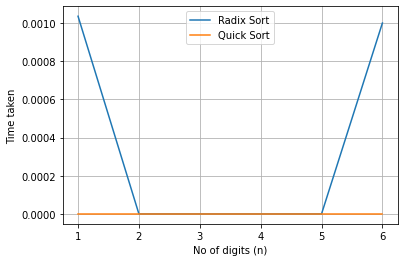

In [101]:
import time
import numpy as np
import matplotlib.pyplot as plt

digit_size = []
bucket_sort_time = []
radix_sort_time = []
quick_sort_time = []


for i in range(0,6):

    array_radix = []
    array_quick = []
    array_bucket = []
    
    n=16
    array = np.random.randint(10**i, (10**(i+1)) , n).tolist()
    digit_size.append(i+1)
    
    array_radix = array
    array_quick = array
    array_bucket = array

    #For bucket sort
    bucket_start_time = time.time()
    bucket_sorted_arr = bucket_sort(array)
    bucket_end_time = time.time()
    
    #For radix sort
    radix_start_time = time.time()
    radix_sorted_array = radix_sort(array_radix)
    radix_end_time = time.time()
    

   
    #For quick sort
    quick_start_time = time.time()
    quick_sorted_array = quick_sort(array_quick, 0, len(array_quick)-1)
    quick_end_time = time.time()
    
   
    bucket_sort_time.append(bucket_end_time-bucket_start_time)
    radix_sort_time.append(radix_end_time-radix_start_time)
    quick_sort_time.append(quick_end_time-quick_start_time)
    
#     print("bucket sorted array", bucket_sorted_arr)
#     print("radix sorted array", radix_sorted_array)
#     print("quick sorted array", quick_sorted_array)

    
print(bucket_sort_time)
print(radix_sort_time)
print(quick_sort_time)
plt.xlabel('No of digits (n)')
plt.ylabel('Time taken')
# plt.plot(digit_size, bucket_sort_time, label ='Bucket Sort')
plt.plot(digit_size, radix_sort_time, label = "Radix Sort")
plt.plot(digit_size, quick_sort_time, label = "Quick Sort")
plt.grid()
plt.legend()
plt.show()